In [3]:
# from getopt import getopt
# import cloudpickle
# import pickle
# import sys
# import os
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy.special import logit, expit
from scipy.stats import uniform, norm, bernoulli, pearsonr
# from statsmodels.stats.proportion import proportions_ztest
from matplotlib import pyplot as plt
# import pymc as pm
# import arviz as az
# from modeltools import mcmc_diagnostics, create_summary_stat
# from downcast import downcast_df
# import jax
# from pymc.sampling_jax import sample_numpyro_nuts
# from time import time, sleep
# from datetime import timedelta

In [25]:
def jitter(arr, scale="linear"):
    if scale=="log":
        return arr*uniform.rvs(0.95,1.05,len(arr))
    elif scale=="linear":
        return arr+uniform.rvs(-1/2,1,len(arr))

In [9]:
p_diff_df = pd.read_csv("data/simulations/sig_p_diff.csv")
p_diffOA_df = pd.read_csv("data/simulations/sigOA_p_diff.csv")
raters_df = pd.read_csv("data/simulations/sig_n_raters.csv")
ratersOA_df = pd.read_csv("data/simulations/sigOA_n_raters.csv")
# p_raters_df =  pd.read_csv("data/simulations/sig_p_n_raters.csv")
# scores_df = pd.read_csv("data/simulations/sig_scores_per_r.csv")
# p_scores_df =  pd.read_csv("data/simulations/sig_p_scores_per_r.csv")

# Adding minimum val to bht_pval for log plots
dfs = [p_diff_df, p_diffOA_df, raters_df, ratersOA_df]
for df in dfs:
    df.loc[:,"bht_pval"]+=1e-4

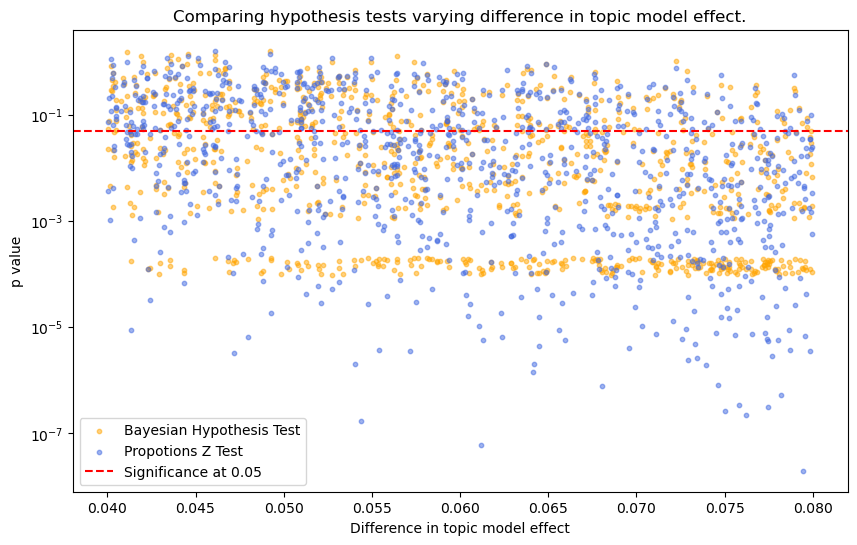

In [26]:
sim_results = p_diff_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(sim_results["p_diff"], jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparing hypothesis tests varying difference in topic model effect.")
ax.set_yscale("log")
ax.set_xlabel("Difference in topic model effect")
ax.set_ylabel("p value")
ax.legend()
plt.show()

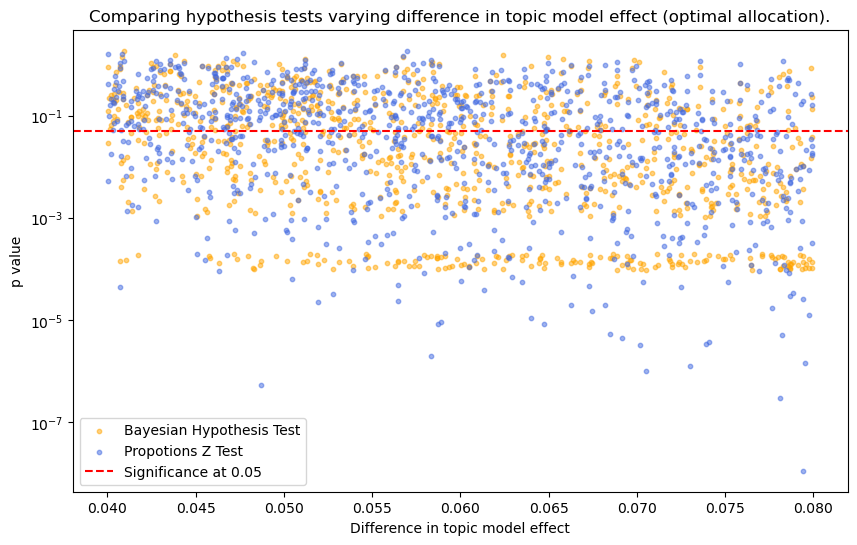

In [28]:
sim_results = p_diffOA_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(sim_results["p_diff"], jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparing hypothesis tests varying difference in topic model effect (optimal allocation).")
ax.set_yscale("log")
ax.set_xlabel("Difference in topic model effect")
ax.set_ylabel("p value")
ax.legend()
plt.show()

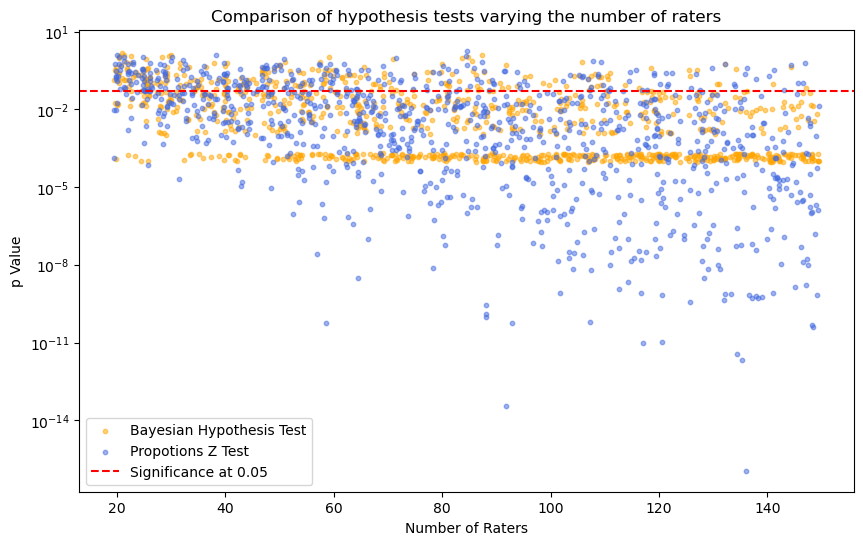

In [29]:
sim_results = raters_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(sim_results["n_raters"]), jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters")
ax.set_yscale("log")
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

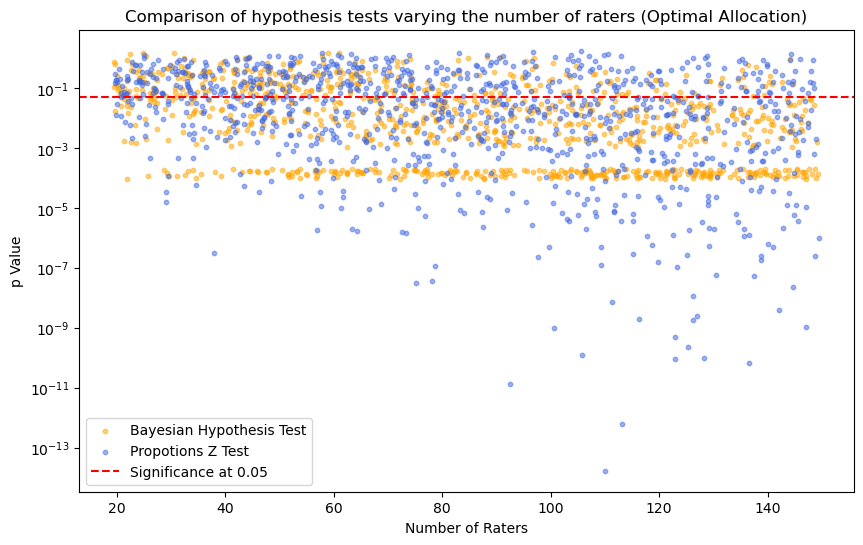

In [30]:
sim_results = ratersOA_df
N = len(sim_results)
legend = {"royalblue":"Propotions Z Test", "orange":"Bayesian Hypothesis Test"}
test = {"royalblue":"propz", "orange":"bht"}

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in reversed(legend):
    ax.scatter(jitter(sim_results["n_raters"]), jitter(sim_results[f"{test[colour]}_pval"], scale="log"),
               c=colour, label=legend[colour], s=10, alpha=0.5)
ax.axhline(y=0.05, color = 'r', linestyle = 'dashed', label="Significance at 0.05") 
ax.set_title("Comparison of hypothesis tests varying the number of raters (Optimal Allocation)")
ax.set_yscale("log")
ax.set_xlabel("Number of Raters")
ax.set_ylabel("p Value")
ax.legend()
plt.show()

In [21]:
# Calculating correlation coefficient
r = pearsonr(raters_df["propz_pval"], raters_df["bht_pval"])[0]
print(f"The correlation between p values of the two significance tests is {r}")

The correlation between p values of the two significance tests is 0.907147495063338


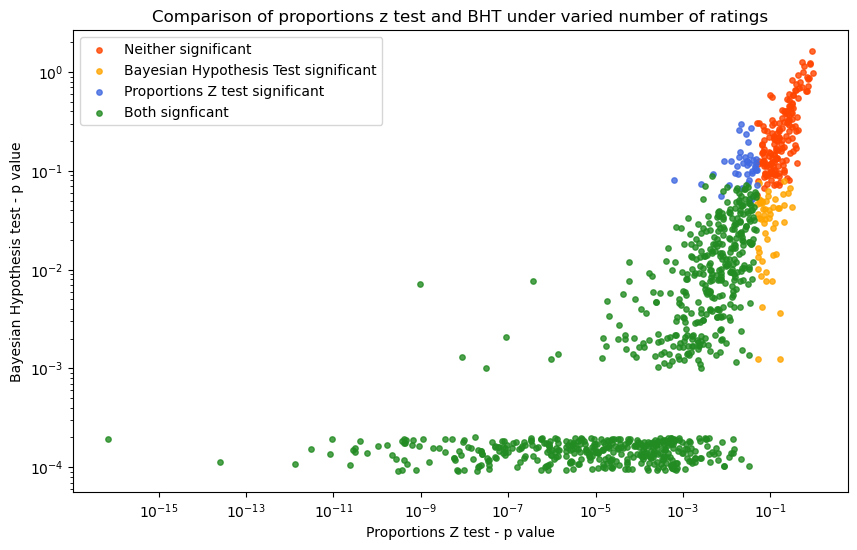

In [19]:
# Comparing prop z test and bh test under different number of raters
sim_results=raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "orange", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], jitter(df["bht_pval"],scale="log"), c=colour, label=legend[colour], s=15, alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT under varied number of ratings")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()

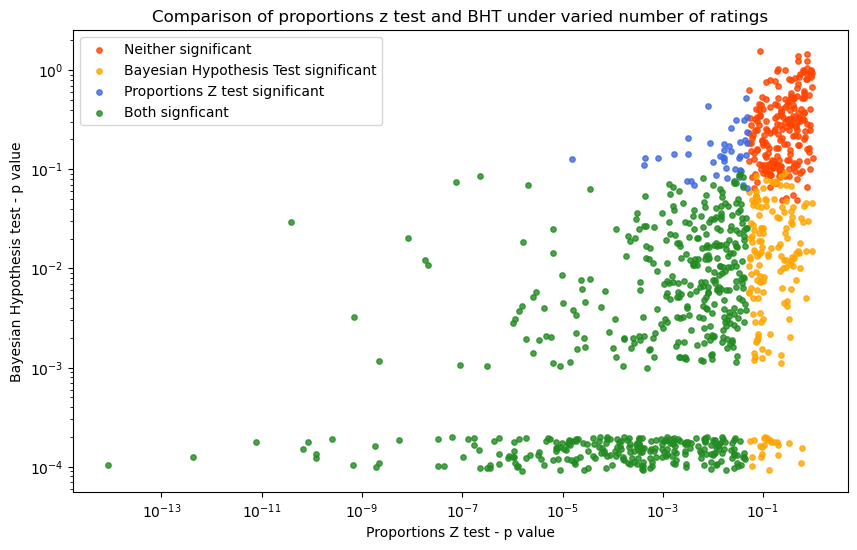

In [20]:
# Comparing prop z test and bh test under different number of raters
sim_results=ratersOA_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "orange", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["propz_pval"], jitter(df["bht_pval"],scale="log"), c=colour, label=legend[colour], s=15, alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT under varied number of ratings")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Proportions Z test - p value")
ax.set_ylabel("Bayesian Hypothesis test - p value")
ax.legend()
plt.show()

## Investigations

In [25]:
# Finding simulations with maximal differences between bht_pval and propz_pval
p_raters_df["pval_ratio"]=p_raters_df["bht_pval"]/p_raters_df["propz_pval"]
p_raters_df[p_raters_df["pval_ratio"]>0].sort_values("pval_ratio")

,sim_id,trial_id,p_diff,n_raters,scores_per_r,total_scores,propz_pval,bht_pval,seed,propz,bht,c,pval_ratio
324,555,0,0.036748,66,35,2310,9.155351e-01,0.310823,597,False,False,orangered,3.394982e-01
212,868,0,0.027462,65,35,2275,4.839977e-01,0.178022,910,False,False,orangered,3.678158e-01
967,496,0,0.026824,69,35,2415,4.889749e-01,0.182195,538,False,False,orangered,3.726052e-01
655,276,0,0.045378,64,35,2240,7.473679e-01,0.287500,318,False,False,orangered,3.846834e-01
369,562,0,0.026917,58,35,2030,8.863161e-01,0.375369,604,False,False,orangered,4.235165e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,5,0,0.123988,61,35,2135,3.705923e-11,0.000468,47,True,True,forestgreen,1.263880e+07
213,202,0,0.111244,69,35,2415,2.606526e-11,0.000828,244,True,True,forestgreen,3.177246e+07
235,872,0,0.167990,48,35,1680,8.671852e-12,0.000595,914,True,True,forestgreen,6.864025e+07
480,247,0,0.178329,61,35,2135,3.288479e-12,0.000468,289,True,True,forestgreen,1.424318e+08


In [31]:
d = p_raters_df[p_raters_df["pval_ratio"]>0]
print("proportion of simulations with lower propz_pval", (d["pval_ratio"]>1).sum()/len(d))

proportion of simulations with lower propz_pval 0.9119496855345912


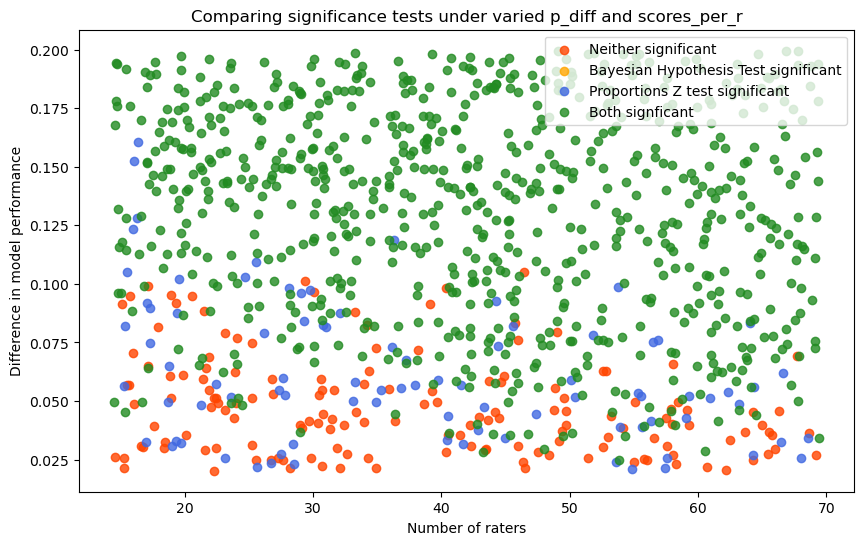

In [16]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_raters_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(jitter(df["n_raters"]), df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparing significance tests under varied p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Number of raters")
ax.legend(loc="upper right")
plt.show()

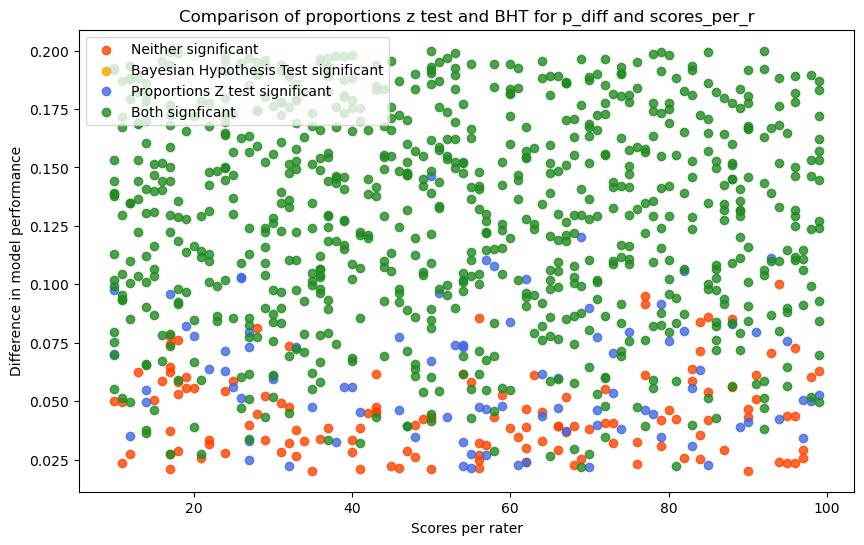

In [15]:
# Comparing prop z test and bh test under different number of raters
sim_results=p_scores_df

legend = {
    "orangered":"Neither significant",
    "orange":"Bayesian Hypothesis Test significant",
    "royalblue": "Proportions Z test significant",
    "forestgreen": "Both signficant"
}

alpha = 0.05
sim_results["propz"] = sim_results["propz_pval"] < alpha
sim_results["bht"] = sim_results["bht_pval"] < alpha

sim_results["c"] = np.select(
    condlist=[
        ~sim_results["propz"] & ~sim_results["bht"],
        ~sim_results["propz"] & sim_results["bht"],
        sim_results["propz"] & ~sim_results["bht"],
        sim_results["propz"] & sim_results["bht"]
    ],
    choicelist=["orangered", "yellow", "royalblue", "forestgreen"],
    default="black")

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for colour in legend:
    df = sim_results[sim_results["c"]==colour]
    ax.scatter(df["scores_per_r"], df["p_diff"], c=colour, label=legend[colour], alpha=0.8)
ax.set_title("Comparison of proportions z test and BHT for p_diff and scores_per_r")
ax.set_ylabel("Difference in model performance")
ax.set_xlabel("Scores per rater")
ax.legend(loc="upper left")
plt.show()